In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime,timedelta

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func



In [4]:
# create engine to hawaii.sqlite
engine = create_engine(f"sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model

Base = automap_base()


In [6]:
Base.prepare(autoload_with=engine)
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
# assign class references

measurement = Base.classes.measurement 
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB

session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.

most_recent_date = session.query(func.max(measurement.date)).scalar()
print(most_recent_date)


2017-08-23


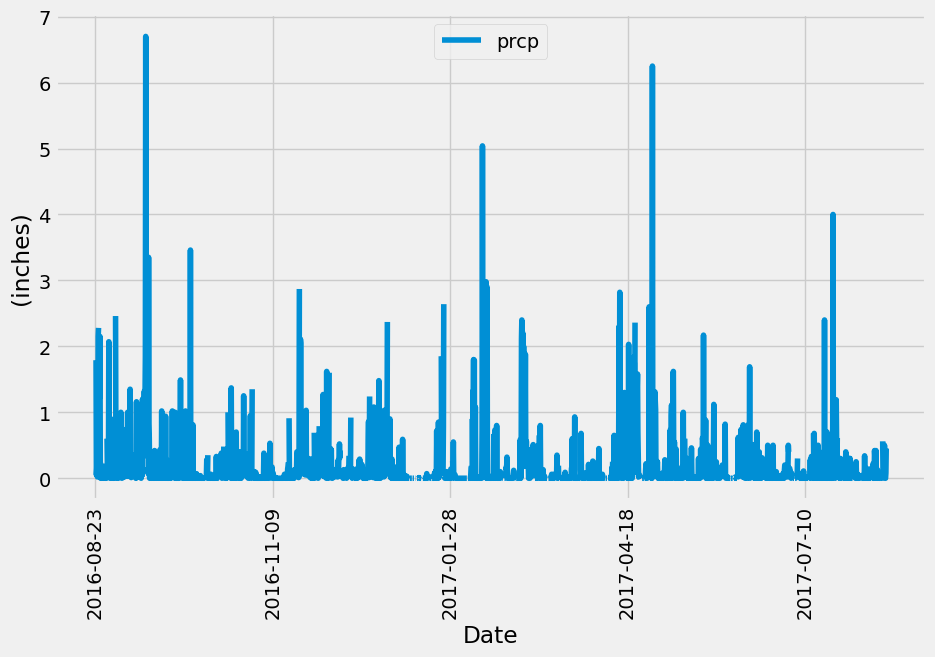

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the date and precipitation scores

import datetime as dt
year = dt.date(2017,8,23)-dt.timedelta(days=365)
result = session.query(measurement.date, measurement.prcp).filter(measurement.date>=year).all()


# Use Pandas Plotting with Matplotlib to plot the data
# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Sort the dataframe by date

df = pd.DataFrame(result,columns=['date', 'prcp']).sort_values('date')

# plot the results by using the dataframe plot method with date as x and precipitation as y

df.plot(x='date', y='prcp', figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('(inches)')
plt.xticks(rotation=90)
plt.savefig('prcp.png')
plt.legend(loc="upper center")


plt.show()



In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data

print(df.describe())


              prcp
count  2021.000000
mean      0.177279
std       0.461190
min       0.000000
25%       0.000000
50%       0.020000
75%       0.130000
max       6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset

count = session.query(func.count().label("station"),station.station).scalar()   
print(count)


9


In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

most_active_stations_based_on_tobs = session.query(measurement.station,func.count().label("tobs")).group_by(measurement.station).order_by(func.count().desc()).all()
print(most_active_stations_based_on_tobs)



[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Design a query that correctly finds the min, max, and average temperatures for the most active station (USC00519281) 

min_max_avg_based_on_most_active_station = session.query(func.min(measurement.tobs).label("Min temp"),func.max(measurement.tobs).label("Max temp"),func.avg(measurement.tobs).label("Average temperature")).filter(measurement.station == "USC00519281").all()
print(min_max_avg_based_on_most_active_station)  

[(54.0, 85.0, 71.66378066378067)]


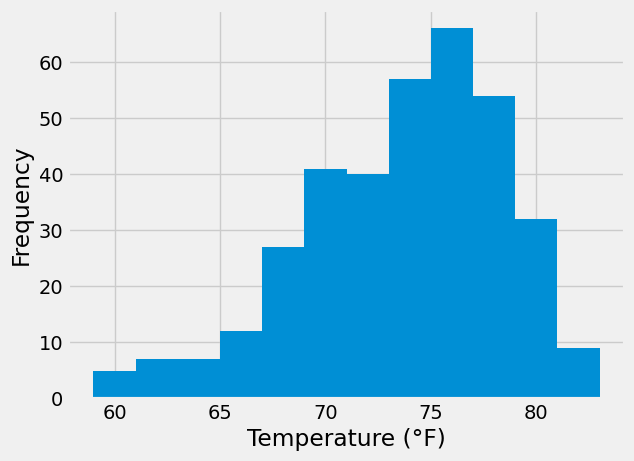

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# first we got the start date twelve months before
date_twelve_months_before_station_most_tobs = (datetime.strptime(session.query(func.max(measurement.date).filter(measurement.station == "USC00519281")).scalar(),"%Y-%m-%d") - timedelta(days=365)).date()
# print(date_twelve_months_before_station_most_tobs)

# use the date we got before to query the data based on most active stations and dates greater or equal to the start date
filtered_data = session.query(measurement.date,measurement.tobs).filter(measurement.station == "USC00519281",measurement.date>=date_twelve_months_before_station_most_tobs).all()

# Save the query result to a pandas DF
filtered_data_df = pd.DataFrame(filtered_data,columns=["date","tobs"])
# print(filtered_data_df)

# Correctly plot a histogram with bins=12 for the last year of data using tobs as the column to count. 
tobs_values = filtered_data_df['tobs']
bins = 12
plt.hist(tobs_values, bins=bins)
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.savefig('frequency.png')
plt.show()

# Close Session

In [37]:
# Close Session
session.close()